In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/demolab-news-popularity-prediction/data_dictionary.csv
/kaggle/input/demolab-news-popularity-prediction/sample.csv
/kaggle/input/demolab-news-popularity-prediction/train.csv
/kaggle/input/demolab-news-popularity-prediction/test.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100) # 100 yerine None yazilabiliyormus

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [3]:
train = pd.read_csv('../input/demolab-news-popularity-prediction/train.csv')
train_shares = train.shares
test = pd.read_csv('../input/demolab-news-popularity-prediction/test.csv')
df = train.append(test)
df.drop(columns=['url', 'shares'], inplace=True)

In [4]:
df.head()

,id,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,0,8.0,211.0,0.629808,1.0,0.800000,6.0,3.0,0.0,0.0,4.606635,8.0,0.0,0.0,0.0,0.0,1.0,0.0,217.0,2300.0,797.714286,0.0,617900.0,115912.500000,0.000000,5103.042553,2568.648709,2000.0,2000.0,2000.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.025025,0.025047,0.025012,0.025377,0.899540,0.647421,0.182837,0.033175,0.004739,0.875000,0.125000,0.413435,0.100000,0.6,-0.100000,NaN,-0.100000,1.000000,0.600000,0.500000,0.600000
1,1,12.0,416.0,0.603535,1.0,0.663580,22.0,7.0,1.0,16.0,5.004808,7.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,768.0,259.400000,0.0,NaN,169071.428571,0.000000,3339.790199,2112.665837,658.0,13700.0,4477.25,0.0,0.0,1.0,0.0,NaN,0.0,0.0,0.0,0.170984,0.029080,0.028572,0.742792,0.028572,0.449248,0.148915,0.038462,NaN,0.800000,0.200000,0.324716,0.033333,1.0,-0.228621,-0.5000,-0.071429,0.000000,0.000000,0.500000,0.000000
2,2,7.0,229.0,0.638393,1.0,0.746479,9.0,4.0,1.0,1.0,4.829694,8.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,1100.0,472.625000,4800.0,843300.0,204837.500000,1575.400000,3562.101631,2589.125480,4800.0,NaN,4800.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.025046,0.025041,0.025001,0.025000,0.899912,0.353209,0.116600,0.034934,0.021834,NaN,0.384615,0.354545,0.050000,1.0,-0.260833,-0.5000,-0.166667,0.000000,0.000000,0.500000,0.000000
3,3,9.0,473.0,0.542373,1.0,0.752809,7.0,0.0,1.0,1.0,4.634249,7.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,447.0,150.400000,0.0,843300.0,229728.571429,0.000000,3504.933802,NaN,0.0,0.0,0.00,0.0,0.0,1.0,0.0,NaN,0.0,0.0,0.0,0.028580,0.028581,0.028577,0.166853,0.747408,0.548957,0.254370,0.065539,0.010571,0.861111,0.138889,0.356253,0.136364,0.7,-0.167500,-0.2500,-0.100000,0.000000,0.000000,0.500000,0.000000
4,4,13.0,1097.0,0.505213,1.0,0.676343,10.0,4.0,14.0,0.0,4.678213,4.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,1200.0,299.250000,33100.0,843300.0,381925.000000,2822.635182,5418.750000,3668.285640,1400.0,2300.0,2000.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.050004,0.052276,0.050148,0.797536,0.050036,0.436525,0.156793,0.041021,0.010027,0.803571,0.196429,0.366255,0.033333,1.0,-0.193182,-0.3125,-0.100000,0.383333,0.166667,0.116667,0.166667


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39644 entries, 0 to 9910
Data columns (total 59 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             39644 non-null  int64  
 1   n_tokens_title                 39644 non-null  float64
 2   n_tokens_content               39644 non-null  float64
 3   n_unique_tokens                39644 non-null  float64
 4   n_non_stop_words               39644 non-null  float64
 5   n_non_stop_unique_tokens       39644 non-null  float64
 6   num_hrefs                      38558 non-null  float64
 7   num_self_hrefs                 33508 non-null  float64
 8   num_imgs                       32379 non-null  float64
 9   num_videos                     38845 non-null  float64
 10  average_token_length           39644 non-null  float64
 11  num_keywords                   39012 non-null  float64
 12  data_channel_is_lifestyle      39644 non-null  

<AxesSubplot:>

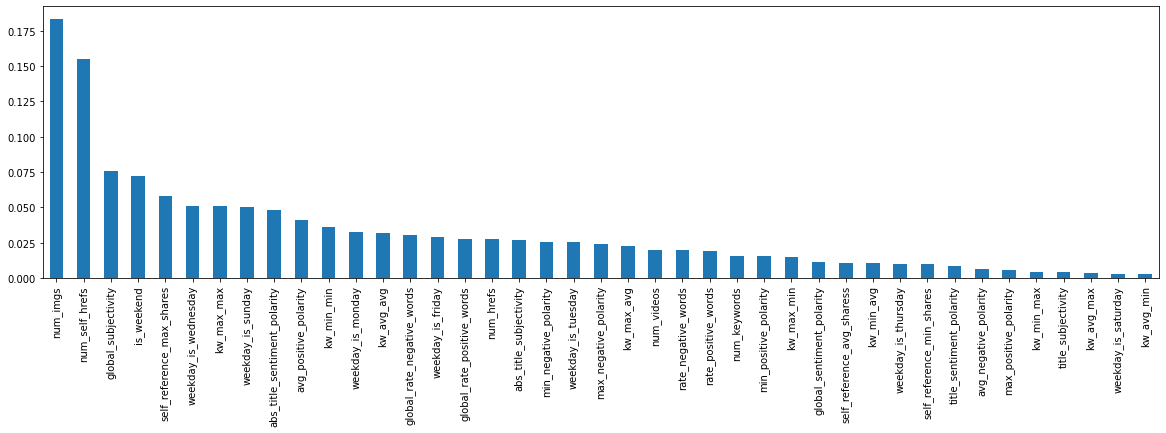

In [6]:
plt.figure(figsize=(20,5))
df.isnull().mean()[train.isnull().mean()>0].sort_values(ascending=False).plot.bar()

## Fill Missing Values

In [7]:
for i in ['num_imgs', 'num_self_hrefs']:
    df.loc[df[i].isnull(), i] = 0

In [8]:
df.loc[:, 'is_weekend'] = df['weekday_is_saturday'] + df['weekday_is_sunday']

(-0.06, 0.11)

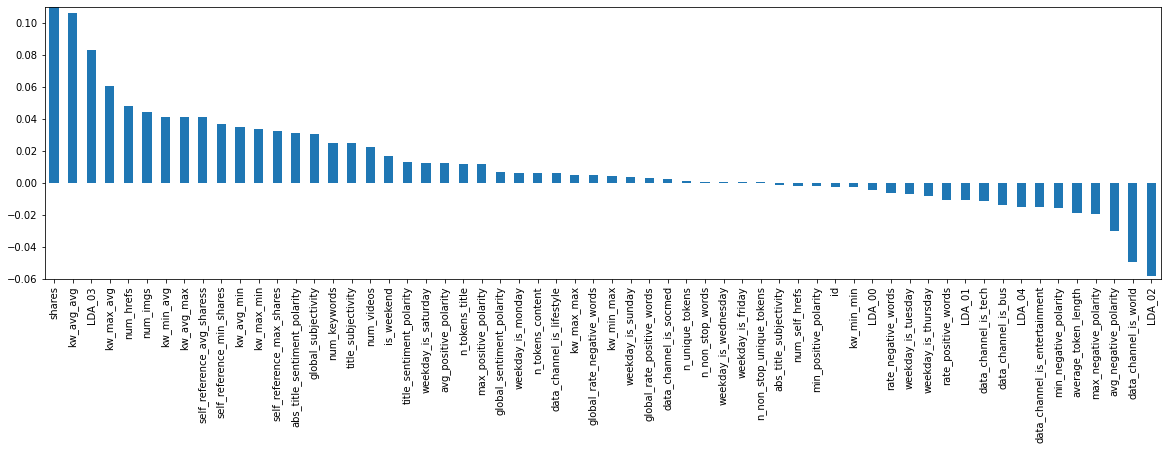

In [9]:
plt.figure(figsize=(20,5))
train.corr()['shares'].sort_values(ascending=False).plot.bar()
plt.ylim([-0.060, 0.11])

<AxesSubplot:>

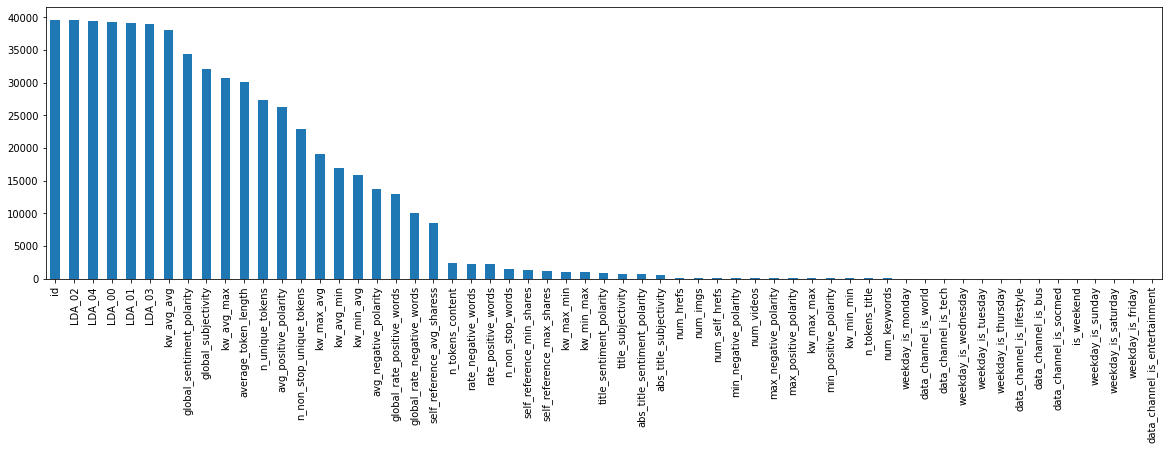

In [10]:
plt.figure(figsize=(20,5))
df.nunique().sort_values(ascending=False).plot.bar()

In [11]:
obj_col = [i for i in df.columns.to_list() if 'is_' in i]
df.loc[:, obj_col] = df[obj_col].astype(object)

## Training and Prediction

In [12]:
df_dummies = pd.get_dummies(df.drop(columns='id'), drop_first=True)
df_train = df_dummies[:train.shape[0]]
df_test = df_dummies[train.shape[0]:]

In [13]:
xgbc=XGBRegressor()
predict = xgbc.fit(df_train, train_shares).predict(df_test)
predict = abs(predict)

In [14]:
submission = pd.read_csv('../input/demolab-news-popularity-prediction/sample.csv')
submission['shares'] = predict
submission.to_csv('submission.csv', index=False)
submission.head()

,id,shares
0,29733,4316.852051
1,29734,3088.900879
2,29735,1518.106079
3,29736,2757.398438
4,29737,2060.670410
